In [18]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Read Input Data

In [19]:
df = pd.read_excel('result.xlsx')

In [20]:
df.sort_values('Time',inplace=True)
#df.drop('Eu Obj', axis =1, inplace=True)
#df.drop('Mod Obj', axis =1, inplace=True)

In [21]:
df.head()

,Avg Area,Avg depth,Avg width,Eu obj,Mod obj,Square_index,Time,n_items
496,2.660309,1.151,1.302,1000.965097,2.950284,0.151116,0.003,4.0
475,2.957609,1.887,1.192,1002.779953,3.169760,0.695496,0.003,4.0
435,5.053735,1.721,2.335,1007.300785,2.488882,0.613941,0.004,5.0
429,3.457172,1.728,1.214,1002.759884,3.480874,0.514331,0.004,4.0
419,6.268342,2.144,2.319,2004.000774,5.945607,0.175243,0.004,6.0


In [22]:
df2 = df[df['Time'] < 300]
#df2 = df.drop(columns=['Obj heur', 'Obj mod', 'Min Time', 'Max Time', 'Min Area', 'Max Area', 'Min D', 'Max D', 'Min W', 'Max W'])

In [23]:
df2.head()

,Avg Area,Avg depth,Avg width,Eu obj,Mod obj,Square_index,Time,n_items
496,2.660309,1.151,1.302,1000.965097,2.950284,0.151116,0.003,4.0
475,2.957609,1.887,1.192,1002.779953,3.169760,0.695496,0.003,4.0
435,5.053735,1.721,2.335,1007.300785,2.488882,0.613941,0.004,5.0
429,3.457172,1.728,1.214,1002.759884,3.480874,0.514331,0.004,4.0
419,6.268342,2.144,2.319,2004.000774,5.945607,0.175243,0.004,6.0


## Correlation

In [24]:
df2.corr()

,Avg Area,Avg depth,Avg width,Eu obj,Mod obj,Square_index,Time,n_items
Avg Area,1.000000,0.499692,0.693651,0.692561,0.810004,0.077690,-0.080424,0.009521
Avg depth,0.499692,1.000000,-0.117151,0.182506,0.441202,0.431885,0.024557,-0.042741
Avg width,0.693651,-0.117151,1.000000,0.543138,0.600121,0.150850,-0.112752,-0.000145
Eu obj,0.692561,0.182506,0.543138,1.000000,0.683839,0.038399,0.033457,0.241534
Mod obj,0.810004,0.441202,0.600121,0.683839,1.000000,0.121656,0.092058,0.332876
Square_index,0.077690,0.431885,0.150850,0.038399,0.121656,1.000000,0.039850,-0.098610
Time,-0.080424,0.024557,-0.112752,0.033457,0.092058,0.039850,1.000000,0.434830
n_items,0.009521,-0.042741,-0.000145,0.241534,0.332876,-0.098610,0.434830,1.000000


Plot of correlation

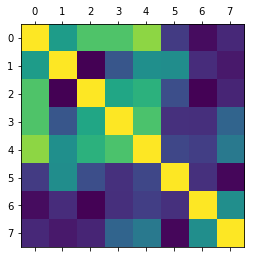

In [25]:
plt.matshow(df2.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f552ecf7650>,
      dtype=object)

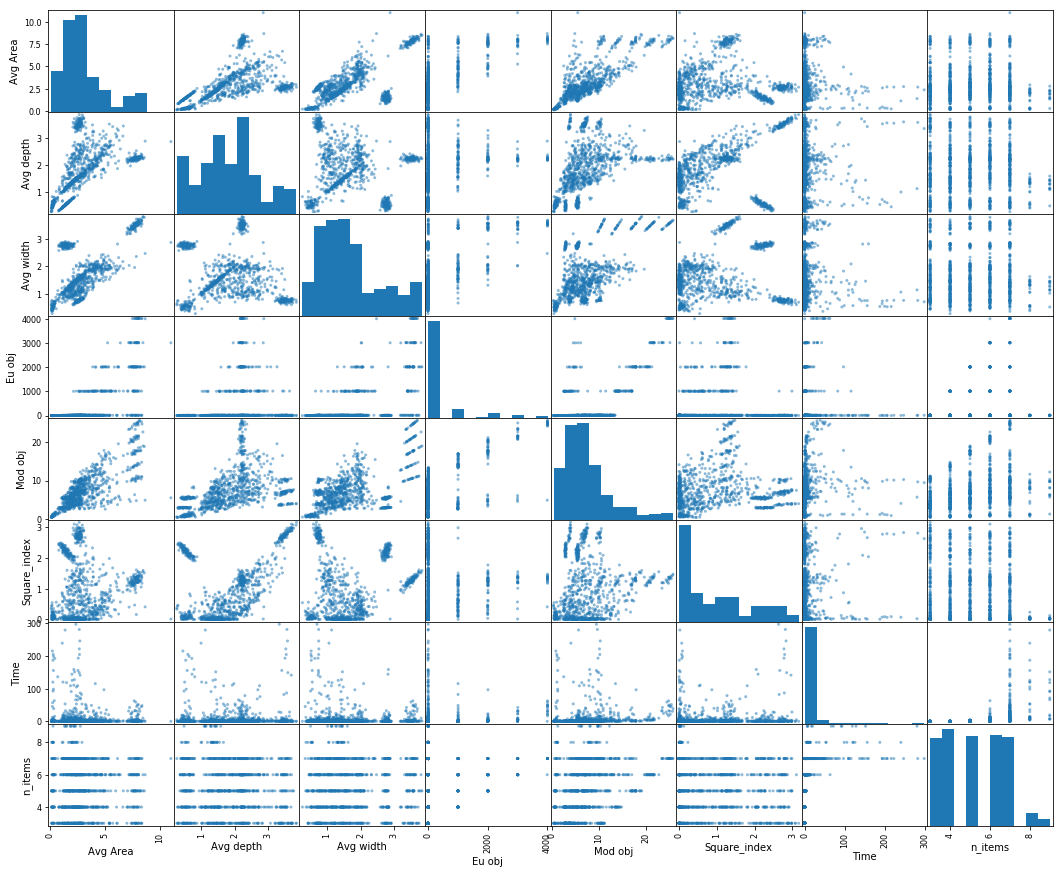

In [26]:
pd.plotting.scatter_matrix(df2, figsize=(18,15))

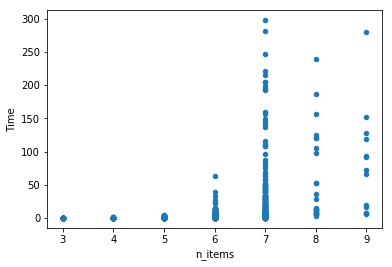

In [27]:
df2.plot.scatter('n_items', 'Time')

## Analyze data information

In [11]:
df2.reset_index(inplace=True,drop=True)

In [12]:
df3 = df2.drop(columns=['Time'])

## Rescale data

In [13]:
scaler = StandardScaler()

In [14]:
df3 = pd.DataFrame(data = scaler.fit_transform(df3))

Rescaled data

In [15]:
df3.head()

,0,1,2,3,4,5,6
0,-0.176737,-0.909233,-0.444473,1.663510,-1.158843,-0.992467,-0.699814
1,0.049308,-0.112174,-0.612371,1.667155,-1.092043,-0.438746,-0.699814
2,0.519199,-0.580013,0.767447,1.668437,-1.219947,-0.494403,0.001010
3,-0.126758,-0.860500,0.138592,1.664158,-1.225527,-0.650622,-0.699814
4,0.206055,-0.483629,0.079064,1.664466,-1.242104,-1.044259,-0.699814


## PCA

In [16]:
pca = PCA()

In [17]:
principalDf = pd.DataFrame(data = pca.fit_transform(df3), columns = ['pc1','pc2','pc3','pc4'])

ValueError: Shape of passed values is (7, 694), indices imply (4, 694)

In [ ]:
cumul_expl_var_ratio = pca.explained_variance_ratio_.cumsum()

In [ ]:
cumul_expl_var_ratio

In [ ]:
pca.explained_variance_ratio_

Data in the new system

In [ ]:
principalDf.head()

New orthogonal system vectors

In [ ]:
pca.components_

In [ ]:
df_compressed = principalDf.drop(columns=['pc4'])
df_compressed = pd.concat([df_compressed, df2['Time']],axis=1)

In [ ]:
df_compressed.head()

In [ ]:
df_compressed.corr()

In [ ]:
pd.plotting.scatter_matrix(df_compressed, figsize=(18,15))

## Linear Regression

In [ ]:
regressor = LinearRegression()

In [ ]:
X = df_compressed.copy()
y = X.pop('Time')

In [ ]:
regressor.fit(X,y)